In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read and Understand The Dataset

## 1.1 Read and Import

In [5]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Capstone Project/fraudTrain.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Capstone Project/fraudTest.csv")

In [6]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


##1.2 Inspect The Dataframes

Inspecting the dataframe's columns, shapes, variable types etc.

In [8]:
# Checking the shape of the dataset
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [9]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There are no null values in training set.

In [10]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no missing value in the test set.

In [11]:
# Concatenate both train and test set
fraud = pd.concat([df_train,df_test],axis=0)

#2. Data Cleaning and Data Preparation

## 2.1 Check for Duplicate Values

In [12]:
print(sum(fraud.duplicated() == True))

0


There are no duplicate rows in the dataset.

In [13]:
fraud.shape

(1852394, 23)

There are 1852394 rows and 23 columns in the entire combined dataset.

In [14]:
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [16]:
no_of_months = pd.to_datetime(fraud['trans_date_trans_time']).dt.to_period('M').nunique()
no_of_months

24

This dataset contains transaction details of 24 months.

In [17]:
# Average number of transactions per month
avg_trans_per_month = fraud.shape[0]/no_of_months
avg_trans_per_month

77183.08333333333

The average number of transactions per month is 77183.

In [18]:
# Average number of fraudulent transaction per month
avg_fraud_trans_per_month = fraud[fraud['is_fraud']==1]['trans_num'].count()/no_of_months
avg_fraud_trans_per_month

402.125

The average number of fraudulent transactions per month is 402.

In [19]:
fraud['unix_time'] = pd.to_datetime(fraud['unix_time'],unit='s')
fraud[['trans_date_trans_time','unix_time']].head(10)

,trans_date_trans_time,unix_time
0,2019-01-01 00:00:18,2012-01-01 00:00:18
1,2019-01-01 00:00:44,2012-01-01 00:00:44
2,2019-01-01 00:00:51,2012-01-01 00:00:51
3,2019-01-01 00:01:16,2012-01-01 00:01:16
4,2019-01-01 00:03:06,2012-01-01 00:03:06
5,2019-01-01 00:04:08,2012-01-01 00:04:08
6,2019-01-01 00:04:42,2012-01-01 00:04:42
7,2019-01-01 00:05:08,2012-01-01 00:05:08
8,2019-01-01 00:05:18,2012-01-01 00:05:18
9,2019-01-01 00:06:01,2012-01-01 00:06:01


There seems to be 7 years difference between 'trans_date_trans_time' and 'unix_time'. Let's add these two columns to the list of 'col_to_drop' as these columns will not provide much value addition to our model.

In [20]:
# Make a list of unwanted columns which can be dropped
col_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'trans_num','unix_time']

In [21]:
# Average amount per fraud transaction
avg_amt_per_fraud_trans = fraud[fraud['is_fraud'] == 1].amt.sum()/fraud[fraud['is_fraud']==1]['trans_num'].count()
avg_amt_per_fraud_trans

530.661412288882

The average amount per fraud transaction is 530.66

## 2.2 Drop Less Significant Columns

In [22]:
fraud = fraud.drop(col_to_drop, axis=1)
fraud.shape

(1852394, 16)

## 2.3 Derived Features

In [23]:
# Function to calculate distance between two sets of geospatial data
from geopy.distance import vincenty
def distance_calc(row):
    start = (row['lat'], row['long'])
    stop = (row['merch_lat'], row['merch_long'])

    return vincenty(start, stop).km

# Create a column 'distance'
fraud['distance'] = fraud.apply (lambda row: distance_calc(row),axis=1)
fraud['distance'].head()

0     78.773821
1     30.216618
2    108.102912
3     95.685115
4     77.702395
Name: distance, dtype: float64

In [24]:
# Drop latitude and longitude and zip columns
fraud = fraud.drop(['lat','long','merch_lat','merch_long','zip'],axis=1)
fraud.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud,distance
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0,78.773821
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0,30.216618
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0,108.102912
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0,95.685115
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0,77.702395


In [25]:
# function to convert dob to years
def age_years(born):
    return 2021 - int(born[0:4])

# replacing the dob column with age column in our data set for test and train
fraud['age'] = fraud['dob'].apply(lambda x: age_years(x))

# Drop dob column
fraud = fraud.drop(['dob'],axis =1)
fraud.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,is_fraud,distance,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",0,78.773821,33
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,0,30.216618,43
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,0,108.102912,59
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,0,95.685115,54
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,0,77.702395,35


In [26]:
#Binning of Age Variable
fraud['age_group'] = pd.cut(fraud.age,[0,25,35,45,55,150], labels = ["<25","25-35","35-45","45-55","55+"])

In [27]:
fraud.shape

(1852394, 13)

In [28]:
fraud.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,is_fraud,distance,age,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",0,78.773821,33,25-35
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,0,30.216618,43,35-45
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,0,108.102912,59,55+
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,0,95.685115,54,45-55
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,0,77.702395,35,25-35


In [29]:
# Drop 'age' column
fraud = fraud.drop('age',axis=1)
fraud.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,is_fraud,distance,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",0,78.773821,25-35
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,0,30.216618,35-45
2,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,0,108.102912,55+
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,0,95.685115,45-55
4,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,0,77.702395,25-35


In [30]:
# Check the number of unique values in each column
fraud.nunique()

merchant         693
category          14
amt            60616
gender             2
street           999
city             906
state             51
city_pop         891
job              497
is_fraud           2
distance     1852394
age_group          5
dtype: int64

In [31]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column     Dtype   
---  ------     -----   
 0   merchant   object  
 1   category   object  
 2   amt        float64 
 3   gender     object  
 4   street     object  
 5   city       object  
 6   state      object  
 7   city_pop   int64   
 8   job        object  
 9   is_fraud   int64   
 10  distance   float64 
 11  age_group  category
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 171.4+ MB


## 2.4 EDA

### 2.4.1 Categorical Variable

In [32]:
fraud_by_category = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='category',aggfunc=np.sum))
fraud_by_category['is_fraud'].sort_values(ascending=False)

category
grocery_pos       2228
shopping_net      2219
misc_net          1182
shopping_pos      1056
gas_transport      772
misc_pos           322
kids_pets          304
entertainment      292
personal_care      290
home               265
food_dining        205
health_fitness     185
grocery_net        175
travel             156
Name: is_fraud, dtype: int64

- Maximum number of fraudulent transaction occurs in categories like 'grocery_pos', 'shopping_net', 'misc_net', 'shopping_pos', 'gas_transport'.
- Minimum number of fraudulent transaction occurs in categories like 'travel', 'grocery_net, 'health_fitness'.

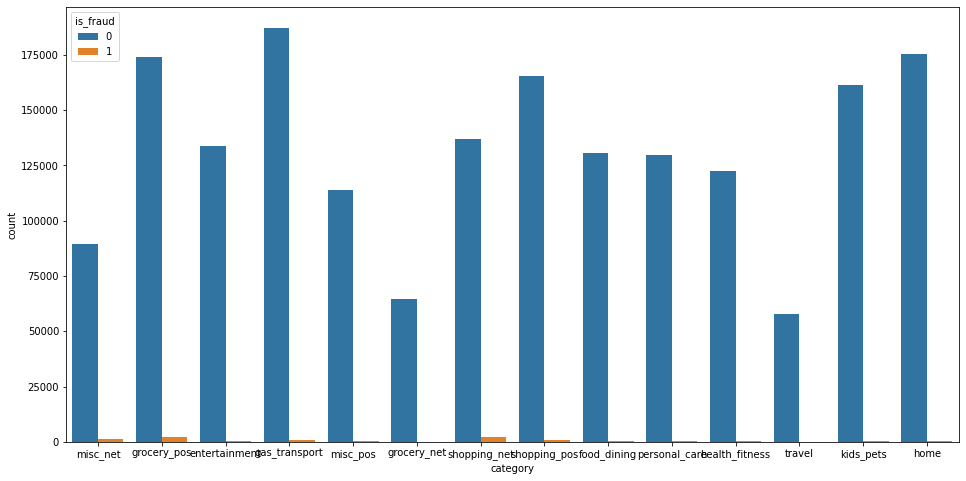

In [33]:
plt.figure(figsize=(16,8))
sns.countplot(fraud['category'],hue=fraud.is_fraud)

In [34]:
fraud_by_gender = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='gender',aggfunc=np.sum))
fraud_by_gender['is_fraud']

gender
F    4899
M    4752
Name: is_fraud, dtype: int64

- Similar number of fraudulent transaction happened in both Male and Female.

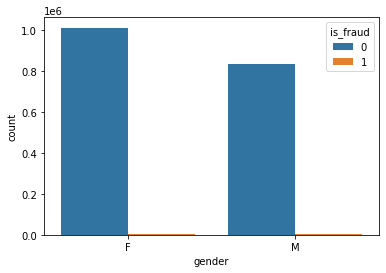

In [35]:
sns.countplot(fraud['gender'],hue=fraud.is_fraud)

In [36]:
fraud_by_merchant = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='merchant',aggfunc=np.sum))
fraud_by_merchant['is_fraud'].sort_values(ascending=False).head()

merchant
fraud_Kilback LLC     62
fraud_Kozey-Boehm     60
fraud_Rau and Sons    60
fraud_Doyle Ltd       57
fraud_Terry-Huel      56
Name: is_fraud, dtype: int64

Maximum number of fraudulent transaction occurs for merchants like 'fraud_Kilback LLC', 'fraud_Kozey-Boehm', 'fraud_Rau and Sons'.

In [37]:
fraud_by_merchant['is_fraud'].sort_values(ascending=False).tail(10)

merchant
fraud_Turner LLC                         1
fraud_Romaguera and Sons                 1
fraud_Wiegand-Lowe                       0
fraud_McKenzie-Huels                     0
fraud_Ritchie, Bradtke and Stiedemann    0
fraud_Reichert-Weissnat                  0
fraud_Gulgowski LLC                      0
fraud_Hodkiewicz, Prohaska and Paucek    0
fraud_Schroeder Group                    0
fraud_Paucek-Wiza                        0
Name: is_fraud, dtype: int64

- No fraudulent transactions found for 8 merchants.

In [38]:
fraud_by_state = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='state',aggfunc=np.sum))
fraud_by_state['is_fraud'].sort_values(ascending=False).head(10)

state
NY    730
TX    592
PA    572
CA    402
OH    360
FL    334
IL    324
MI    299
MN    280
AL    278
Name: is_fraud, dtype: int64

- Maximum number of fraud happens in 'NY', 'TX', 'PA', 'CA' states.

In [39]:
fraud_by_state['is_fraud'].sort_values(ascending=False).tail(10)

state
AZ    64
UT    61
CT    56
AK    50
NV    47
ID    33
DC    31
HI    16
RI    15
DE     9
Name: is_fraud, dtype: int64

- Minimum number of fraud happens in 'HI', 'RI' and 'DE' states.

In [40]:
fraud_by_city = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='city',aggfunc=np.sum))
fraud_by_city['is_fraud'].sort_values(ascending=False).head(10)

city
Dallas           39
Houston          39
Birmingham       36
New York City    35
Camden           34
Allentown        34
Warren           33
Detroit          33
Washington       31
Arcadia          30
Name: is_fraud, dtype: int64

In [41]:
fraud_by_city['is_fraud'].sort_values(ascending=False).tail(20)

city
Kilgore          2
Woods Cross      0
Lubbock          0
Kirtland Afb     0
Pittsburgh       0
Tallmansville    0
Clay Center      0
Baroda           0
Cord             0
Ratcliff         0
Ballwin          0
Belgrade         0
Hinckley         0
Tomahawk         0
San Angelo       0
Pewee Valley     0
Milwaukee        0
Wheaton          0
Mayersville      0
Alton            0
Name: is_fraud, dtype: int64

- No fraudulent transactions found in 19 cities.

In [42]:
fraud_by_job = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='job',aggfunc=np.sum))
fraud_by_job['is_fraud'].sort_values(ascending=False).head(10)

job
Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
Trading standards officer                56
Podiatrist                               54
Film/video editor                        52
Colour technologist                      51
Exhibition designer                      51
Name: is_fraud, dtype: int64

- Maximum fraudulent transaction occurs for customers falling in job categories like 'Quantity surveyor', 'Naval architect', 'Materials engineer'.

In [43]:
fraud_by_job['is_fraud'].sort_values(ascending=False).tail(10)

job
Local government officer        4
Professor Emeritus              4
Interpreter                     4
Designer, exhibition/display    4
Statistician                    3
Health physicist                3
Contractor                      2
Stage manager                   0
Engineer, drilling              0
Engineer, communications        0
Name: is_fraud, dtype: int64

- No fraudulent transaction occurs for customers falling in job categories like 'Stage manager', 'Engineer, drilling', 'Engineer, communications'.

In [44]:
fraud_by_age = pd.DataFrame(pd.pivot_table(fraud,values='is_fraud',index='age_group',aggfunc=np.sum))
fraud_by_age

,is_fraud
age_group,
<25,770
25-35,1807
35-45,1543
45-55,1897
55+,3634


In [45]:
fraud['age_group'].value_counts()

55+      540945
45-55    397228
35-45    394733
25-35    379655
<25      139833
Name: age_group, dtype: int64

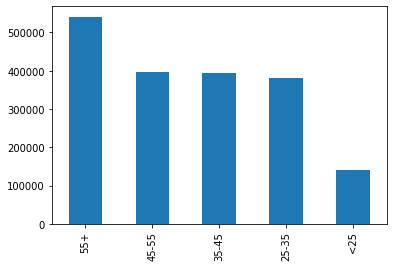

In [46]:
fraud['age_group'].value_counts().plot.bar()
plt.show()

- The number of transactions and fraudulent transactions are highest in the age group of '55+'
- The number of transactions and fraudulent transactions are highest in the age group of '<25'

### 2.4.2 Numerical Variables

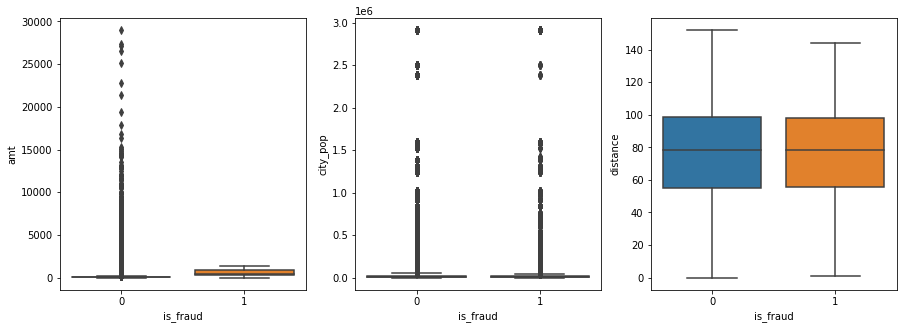

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'is_fraud', y = 'amt', data=fraud)

plt.subplot(1,3,2)
sns.boxplot(x = 'is_fraud', y = 'city_pop', data=fraud)

plt.subplot(1,3,3)
sns.boxplot(x = 'is_fraud', y = 'distance', data=fraud)
plt.show()

- Outliers are present in 'amt' and 'city_pop' column.
- The mean distance is almost same for both fraudulent and non-fraudulent transactions.

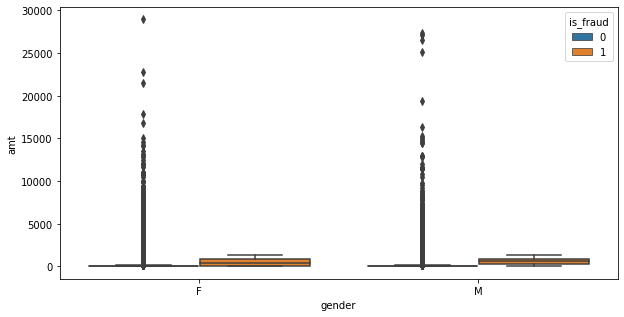

In [48]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'gender', y = 'amt', hue = 'is_fraud', data = fraud)
plt.show()

In [49]:
fraud.dtypes

merchant       object
category       object
amt           float64
gender         object
street         object
city           object
state          object
city_pop        int64
job            object
is_fraud        int64
distance      float64
age_group    category
dtype: object

In [50]:
num_col = ['amt','city_pop','is_fraud','distance']

## 2.5 Label Encoding

In [51]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
for col in fraud.columns:
  if col not in num_col:
    fraud[col]= label_encoder.fit_transform(fraud[col]) 
  
fraud.head()

,merchant,category,amt,gender,street,city,state,city_pop,job,is_fraud,distance,age_group
0,514,8,4.97,0,576,532,27,3495,372,0,78.773821,0
1,241,4,107.23,0,439,619,47,149,431,0,30.216618,1
2,390,0,220.11,1,610,474,13,4154,308,0,108.102912,3
3,360,2,45.00,1,945,84,26,1939,330,0,95.685115,2
4,297,9,41.96,1,422,217,45,99,116,0,77.702395,0


Let's create mean encoding for merchant, street, city and job variables.

##2.6 Train - Test Split

In [52]:
# Separating Train and Test set
train = fraud.iloc[:1296675,:]
test = fraud.iloc[1296675:,:]
print(train.shape, test.shape)

(1296675, 12) (555719, 12)


In [53]:
# Putting feature variable to X_train and X_test
X_train = train.drop('is_fraud', axis=1)
X_test = test.drop('is_fraud', axis=1)

# Putting response variable to y_train and y_test
y_train = train['is_fraud']
y_test = test['is_fraud']

##2.7 Handle Class Imbalance

In [54]:
fraud['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [55]:
y_train.value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

The data set is highly imbalanced. Only 0.5% of the training data are fraudulent transactions. So I will handle the imbalanced dataset.

In [56]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

2578338

# 3. Model Building

#3.1 Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
logreg.fit(X_resampled_smt, y_resampled_smt)
y_pred_smt = logreg.predict(X_test)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [60]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('F1 score: ', f1_score(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('Recall: ', recall_score(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('Precision: ', precision_score(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('ROC AUC : ', roc_auc_score(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('\n clasification report:\n', classification_report(y_resampled_smt,logreg.predict(X_resampled_smt)))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_smt,logreg.predict(X_resampled_smt)))

Accuracy:  0.8472163075593657
F1 score:  0.8326081192251994
Recall:  0.7599469115375874
Precision:  0.9206331008806015
ROC AUC :  0.8472163075593658

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86   1289169
           1       0.92      0.76      0.83   1289169

    accuracy                           0.85   2578338
   macro avg       0.86      0.85      0.85   2578338
weighted avg       0.86      0.85      0.85   2578338


 confussion matrix:
 [[1204710   84459]
 [ 309469  979700]]


In [61]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('ROC AUC : ', roc_auc_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.9343841041965454
F1 score:  0.08132621183109946
Recall:  0.7524475524475525
Precision:  0.0429861240578475
ROC AUC :  0.8437683140814068

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.04      0.75      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719


 confussion matrix:
 [[517641  35933]
 [   531   1614]]


#### Observation:

- Accuracy is good in case of test set predictions.
- Recall value is almost same in both train and test set.

## 3.2  Logistic Regression Using Grid Search

In [62]:
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import GridSearchCV
# Number of folds
n_folds = 5
# parameters 
params ={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}
model_lrh = GridSearchCV(estimator=logreg, cv=n_folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [63]:
# Fitting the model
model_lrh.fit(X_resampled_smt,y_resampled_smt)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 13.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [64]:
print("Logistic Regression with Best AUC : ", model_lrh.best_score_)
print("Logistic Regression with Best hyperparameters: ", model_lrh.best_params_)

Logistic Regression with Best AUC :  0.8561060434991692
Logistic Regression with Best hyperparameters:  {'C': 0.5, 'penalty': 'l2'}


In [65]:
# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=5)

In [66]:
# Prediction on Test Set
model_lrh_tuned.fit(X_resampled_smt,y_resampled_smt)
y_predicted = model_lrh_tuned.predict(X_test)

In [67]:
# Evaluation on Train set
print('Classification report:\n', classification_report(y_resampled_smt, model_lrh_tuned.predict(X_resampled_smt)))
print('Confusion matrix:\n',confusion_matrix(y_resampled_smt, model_lrh_tuned.predict(X_resampled_smt)))
print("Logistic Regression Accuracy: ",accuracy_score(y_resampled_smt, model_lrh_tuned.predict(X_resampled_smt)))
print('ROC AUC : ', roc_auc_score(y_resampled_smt, model_lrh_tuned.predict(X_resampled_smt)))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86   1289169
           1       0.92      0.76      0.83   1289169

    accuracy                           0.85   2578338
   macro avg       0.86      0.85      0.85   2578338
weighted avg       0.86      0.85      0.85   2578338

Confusion matrix:
 [[1209539   79630]
 [ 311488  977681]]
Logistic Regression Accuracy:  0.8483061569119332
ROC AUC :  0.8483061569119331


In [68]:
#Evaluation on Test set
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_predicted))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.75      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.85      0.53    555719
weighted avg       1.00      0.94      0.96    555719

Confusion matrix:
 [[519833  33741]
 [   530   1615]]
Logistic Regression Accuracy:  0.9383303432130268
ROC AUC :  0.8459812760854718


In [69]:
# Function for roc_curve
def plot_roc_curve(fpr,tpr,roc_auc):
    plt.plot(fpr, tpr, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

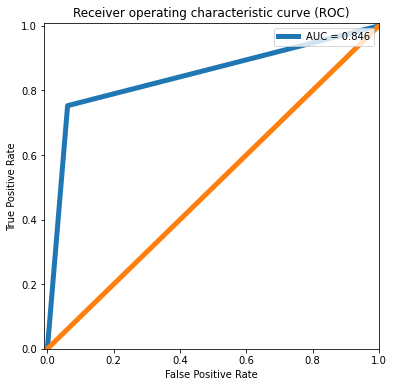

In [70]:
# Create true and false positive rates
fpr, tpr, threshold = roc_curve(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)
# Plot the roc curve 
plt.rcParams['figure.figsize'] = [6,6]
plot_roc_curve(fpr,tpr,roc_auc)

## 3.3  Decision Tree

In [71]:
#Decision Tree - SMOTE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_resampled_smt,y_resampled_smt)

y_pred_dt = dt.predict(X_test)

In [72]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('F1 score: ', f1_score(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('Recall: ', recall_score(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('Precision: ', precision_score(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('ROC AUC : ', roc_auc_score(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('\n clasification report:\n', classification_report(y_resampled_smt, dt.predict(X_resampled_smt)))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_smt, dt.predict(X_resampled_smt)))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0
ROC AUC :  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338


 confussion matrix:
 [[1289169       0]
 [      0 1289169]]


In [73]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print ('F1 score: ', f1_score(y_test, y_pred_dt))
print ('Recall: ', recall_score(y_test, y_pred_dt))
print ('Precision: ', precision_score(y_test, y_pred_dt))
print ('ROC AUC : ', roc_auc_score(y_test, y_pred_dt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dt))

Accuracy:  0.9958900091593054
F1 score:  0.54191736863217
Recall:  0.6298368298368299
Precision:  0.47553678282294964
ROC AUC :  0.813572614718261

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.63      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.81      0.77    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552084   1490]
 [   794   1351]]


#### Observation:

- Training and Test accuracy is good.
- Recall value on Test set is around 63%

## 3.4 Random Forest

In [78]:
#Random Forest  - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf = rf.predict(X_test)

In [79]:
# Evaluation on Train Set
print ('Accuracy: ', accuracy_score(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('F1 score: ', f1_score(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('Recall: ', recall_score(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('Precision: ', precision_score(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('ROC AUC : ', roc_auc_score(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('\n clasification report:\n', classification_report(y_resampled_smt, rf.predict(X_resampled_smt)))
print ('\n confussion matrix:\n',confusion_matrix(y_resampled_smt, rf.predict(X_resampled_smt)))

Accuracy:  1.0
F1 score:  1.0
Recall:  1.0
Precision:  1.0
ROC AUC :  1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338


 confussion matrix:
 [[1289169       0]
 [      0 1289169]]


In [80]:
# Evaluation on Test Set
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('ROC AUC : ', roc_auc_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9968851163987554
F1 score:  0.5997687861271677
Recall:  0.6046620046620047
Precision:  0.594954128440367
ROC AUC :  0.8015334576486293

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.59      0.60      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.80      0.80    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552691    883]
 [   848   1297]]


#### Observation:

- Training and Test accuracy is good.
- Recall Value on Test set is around 59%

## 3.5 Hyperparamater Tuning

In [81]:
# Defining Parameters
params = { 
    'n_estimators': [200, 400],
    'max_depth' : [4,5,6,7,8]
}

In [82]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_resampled_smt,y_resampled_smt)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 50, cv = cross_val,
                                verbose=1, random_state=42, n_jobs = -1,scoring='recall')

In [ ]:
# Fitting the model on train data
clf_random.fit(X_resampled_smt, y_resampled_smt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [75]:
# Passing the best parameteres based on Randomized Search CV
from sklearn.ensemble import RandomForestClassifier
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                                class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                                criterion='gini',
                                max_depth=5,
                                max_features='sqrt',
                                min_samples_leaf=10,
                                n_estimators=200,
                                n_jobs=-1, 
                                random_state=42)

In [76]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_resampled_smt,y_resampled_smt)
y_predicted = model_rfc_tuned.predict(X_test)

In [77]:
print ('Accuracy: ', accuracy_score(y_test, y_predicted))
print ('F1 score: ', f1_score(y_test, y_predicted))
print ('Recall: ', recall_score(y_test, y_predicted))
print ('Precision: ', precision_score(y_test, y_predicted))
print ('ROC AUC : ', roc_auc_score(y_test, y_predicted))
print ('\n clasification report:\n', classification_report(y_test,y_predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_predicted))

Accuracy:  0.2208418283341041
F1 score:  0.009719995517366773
Recall:  0.9906759906759907
Precision:  0.004883957177463468
ROC AUC :  0.604267424827097

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.22      0.36    553574
           1       0.00      0.99      0.01      2145

    accuracy                           0.22    555719
   macro avg       0.50      0.60      0.18    555719
weighted avg       1.00      0.22      0.36    555719


 confussion matrix:
 [[120601 432973]
 [    20   2125]]


- Accuracy on the test set is poor. So we will not consider this model.

# 4. Conclusion

- Logistic Regression model holds good to correctly identify the fraudulent transactions with a recall value of 75%.